## Chapter 3 - The forecaster's toolbox

This notebook contains some solutions to the exercises in chapter 3 in [Forecasting: Principles and Practice](https://otexts.com/fpp2/).

### Setup

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf

DATA_PATH = '../data/'

# Plot settings
sns.set_context('notebook') 
sns.set_style('darkgrid')
%matplotlib inline

### Question 1
For the following series, find an appropriate Box-Cox transformation in order to stabilise the variance.

1. `usnetelec`
2. `usgdp`
3. `mcopper`
4. `enplanements`

### Question 2
Why is a Box-Cox transformation unhelpful for the `cangas` data?

My guess is whatever value of lambda is chosen doesn't stabilize the variance and so transformation isn't inducing stationarity in the time series.

### Question 3
What Box-Cox transformation would you select for your retail data (from Exercise 3 in Section 2.10)?

### Question 4

For each of the following series, make a graph of the data. If transforming seems appropriate, do so and describe the effect. `dole`, `usdeaths`, `bricksq`

### Question 5

### Question 6

### Question 7

Are the following statements true or false? Explain your answer.

1. Good forecast methods should have normally distributed residuals.
    - False, not necessary but if true makes constructing prediction intervals significantly easier

2. The best measure of forecast accuracy is MAPE.
    - False, in some cases percentage error doesn't make intuitive sense i.e. in forecasting temperature, also does very poorly if $y_t$ is close to 0.

3. If your model doesn’t forecast well, you should make it more complicated.
    - False, Occam's razor you want models to be as simple as possible. More complicated and you risk overfitting to the data.
    
4. Always choose the model with the best forecast accuracy as measured on the test set.
    - True, gives you the "best" estimate of out of sample performance that you have.

### Question 8

For your retail time series (from Exercise 3 in Section 2.10):

a.) split that data into two parts with train having data from year 1998-2010 and 2011 onwards

In [64]:
retail = pd.read_excel(DATA_PATH+'retail.xlsx', header=1, parse_dates=['Series ID'], index_col = 'Series ID')
col = "A3349564W"
df = retail[col] 

train_df = df.loc["1998":"2011"]
test_df = df.loc["2011":]

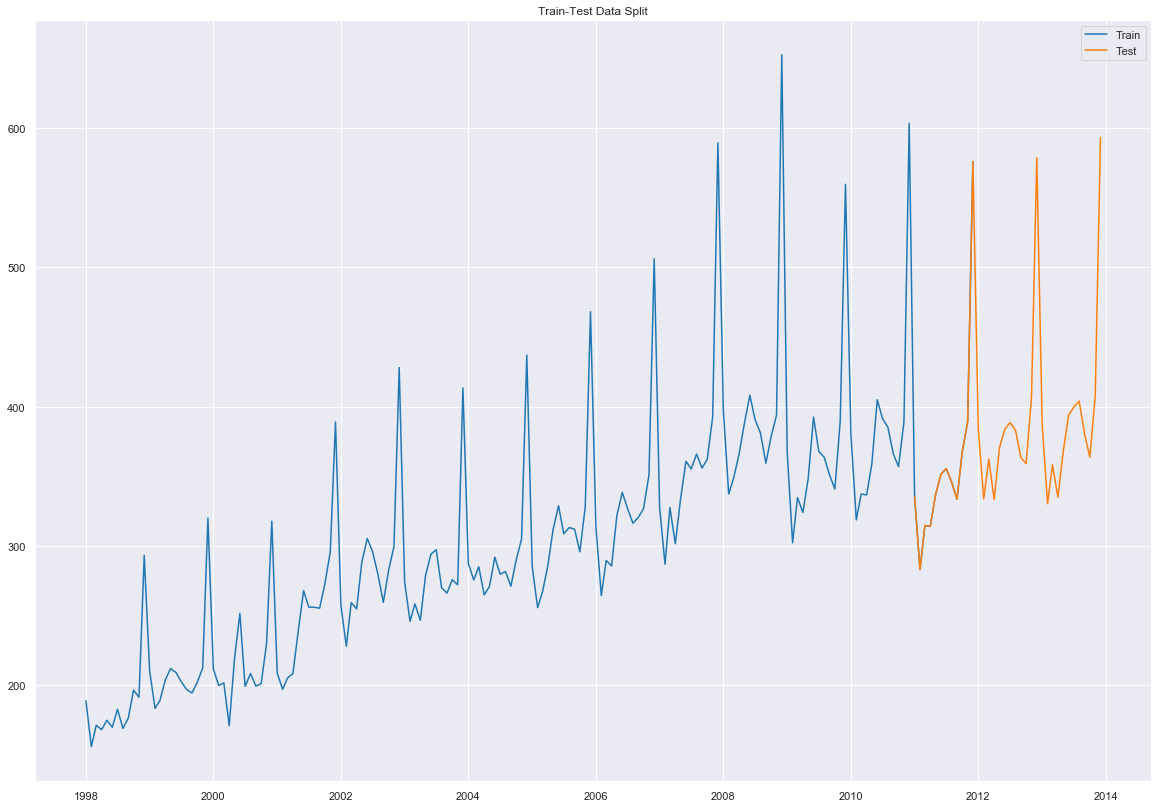

In [69]:
fig = plt.figure(figsize=(20, 14))
ax = fig.add_subplot(111)
ax.set_title("Train-Test Data Split")
ax.plot(train_df, label="Train")
ax.plot(test_df, label="Test")
ax.legend()
plt.show()

b.) Calculate forecasts using seasonal naive method and apply to test data

In [30]:
seasonal_naive_forecast = train_df.groupby(by=train_df.index.month).mean()
seasonal_naive_forecast

Series ID
1     382.10
2     326.25
3     349.80
4     334.95
5     364.55
6     394.40
7     390.00
8     384.15
9     364.75
10    358.00
11    398.05
12    591.00
Name: A3349564W, dtype: float64

c.) compute the forecast error with the test set

In [34]:
forecast_error = test_df.values - seasonal_naive_forecast.values
accuracy = np.mean(np.abs(forecast_error))

In [55]:
forecast_error_df = pd.DataFrame(test_df.copy())
forecast_error_df['seasonal_naive'] = seasonal_naive_forecast.values
forecast_error_df['error'] = forecast_error_df['A3349564W'] - forecast_error_df['seasonal_naive']

In [70]:
accuracy_df = pd.DataFrame(0, columns=['MSE', 'MAE'], index=['train', 'test'])
accuracy_df.loc['test', 'MSE'] = np.mean(forecast_error_df['error']**2)
accuracy_df.loc['test', 'MAE'] = np.mean(np.abs(forecast_error_df['error']))
accuracy_df

,MSE,MAE
train,0.000000,0.000000
test,1030.169583,29.516667


d.) Check the residuals

In [92]:
residuals_df = pd.DataFrame(train_df).copy()
residuals_df['month'] = residuals_df.index.month
residuals_df['forecast'] = residuals_df['month'].apply(lambda x: seasonal_naive_forecast[x])
residuals_df['residual'] = residuals_df['A3349564W'] - residuals_df['forecast']

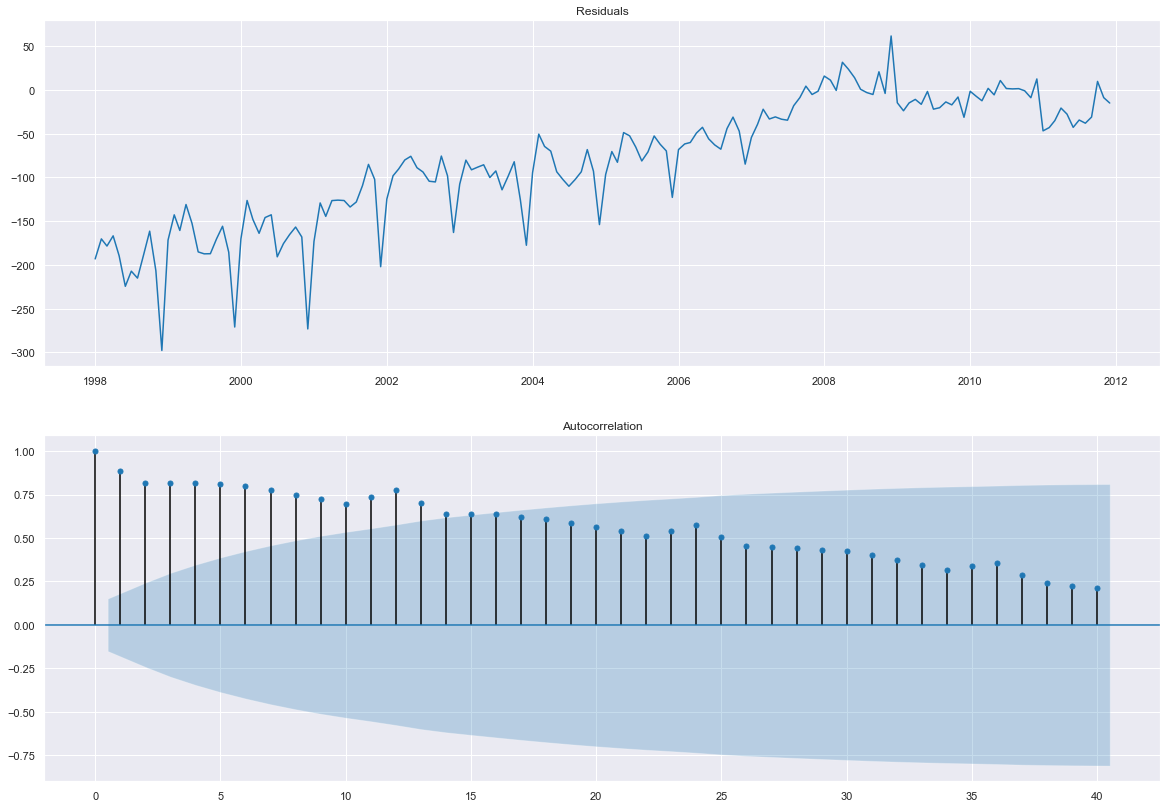

In [93]:
fig = plt.figure(figsize=(20, 14))
ax = fig.add_subplot(211)
ax.set_title('Residuals')
ax.plot(residuals_df['residual'])
ax.grid(True)

ax = fig.add_subplot(212)
ax.set_title('Residuals ACF')
plot_acf(residuals_df['residual'], lags=40, ax=ax)
ax.grid(True)

Residuals look very correlated to me, definitely not a good foreast to use the seasonal naive method.